[View in Colaboratory](https://colab.research.google.com/github/calicinio/Testando/blob/master/Copy_of_Hierarchical_clustering.ipynb)

# AGRUPAMENTO HIERÁRQUICO E ÍNDICES DE DESEMPENHO PARA AGRUPAMENTO

Você sabe a diferença entre agrupamento e classificação? Embora parecidas, ambas são técnicas de mineração de dados, que possuem algumas diferenças, conforme descrito à seguir.

A principal diferença entre essas técnicas, é que o agrupamento é um tipo de aprendizado de máquina não supervisionado, ou seja, não sabemos qual é a saída correta do conjunto de dados estudado, onde é amplamente utilizada para agrupar instâncias semelhantes com base em característica. Já a classificação, se trata de uma técnica de aprendizado supervisionado, onde dado um conjunto de dados rotulados, já sabemos qual é a nossa saída correta e que esta mesma saída deve ser semelhante ao conjunto, tendo a ideia de que existe uma relação entre a entrada e a saída, esse tipo de técnica é usada para atribuir tags pré-definidas a instâncias no com base em características.

## Agrupamento

O agrupamento não é considerado um único algoritmo em específico, mas sim, um método geral de resolver uma determinada tarefa. O método a ser utilizado depende muito das configurações de parâmetros e do conjuto de dados individuais a serem utilizados, não sendo uma tarefa automática, mas sim, um processo iterativo de descoberta.

O método de agrupamento K-means e o agrupamento hierárquico (principal foco deste notebook) são dois algoritmos de agrupamento comuns usados na mineração de dados.

Resumindo:

*   O agrupamento é uma técnica de aprendizado não supervisionada usada para agrupar instâncias semelhantes com base em recursos.
*   Um conjunto de treinamento não é usado no agrupamento.
*   Os conceitos estatísticos são usados e os conjuntos de dados são divididos em subconjuntos com recursos semelhantes.
*   Não há rótulos no agrupamento.
*   O objetivo do cluster é agrupar um conjunto de objetos para determinar se existe alguma relação entre eles.


## Agrupamento hierárquico

Existem duas classes de agrupamento hierárquico: o agrupamento aglomerativo e o agrupamento por divisão. 

No agrupamento aglomerativo (Botton-up), cada amostra dos dados é considerada como um grupo, separado dos demais, e posteriormente esses grupos são recursivamente fundidos até se produzir um  agrupamento final, é dizer, a cada iteração os clusters com maior similaridade são agrupados até que algum critério de parada seja identificado.

No agrupamento por divisão (Top-down), é justamente o processo contrário, onde todas as amostras se iniciam fazendo parte de um único grupo e, em seguida esse grupo é recursivamente dividido até produzir um agrupamento final.

A biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python, a scikit-learn possui uma classe de funções que implementa o método de agrupamento hierárquico do tipo aglomerativo, ou seja, utiliza a abordagem que todas as amostras são consideradas  de diferentes grupos, que vão sendo unidas a cada iteração, de acordo com a métrica escolhida.

A escolha dessa métrica é de suma importância para o bom desempenho do algoritmo, e podem ser de três tipos:



*   **Ward**: minimiza a soma das diferenças dos quadradas dentro de todos os agrupamentos. É uma abordagem de minimização entre variações e, é semelhante à função objetivo do algoritmo k-means, mas realizada com uma abordagem hierárquica aglomerativa.
*   **Complete**: minimiza a distância máxima entre as observações de pares dos agrupamentos.
*   **Average**: minimiza a média das distâncias entre todas as observações entre pares dos agrupamentos.



In [0]:
from sklearn.datasets import make_classification, make_blobs, make_circles # gera amostras sintéticas
from sklearn.cluster import AgglomerativeClustering, KMeans # geração dos modelos de agrupamento 
from sklearn.neighbors import kneighbors_graph # conectividade 
from scipy.spatial.distance import cdist # distâncias 
from scipy.cluster import hierarchy  # dendrograma

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Dendrogramas
O agrupamento hierárquico é represnetado por um diagrama conhecido como Dendrograma (dendro = árvore). Nesse tipo de diagrama cada folha representa uma das observações. As folhas do Dendrograma vão se fundindo conforme a similaridade das observações. Esse processdo de fusão das observações que dão origem aos clusters. 

<img src = "https://support.minitab.com/en-us/minitab/18/cluster_obs_dendrogram_with_final_partition_glove_testers.png">

Altere o código abaixo para que que possa ser exibido um **Dendrograma** a partir de um conjunto de amostras sintéticas. 

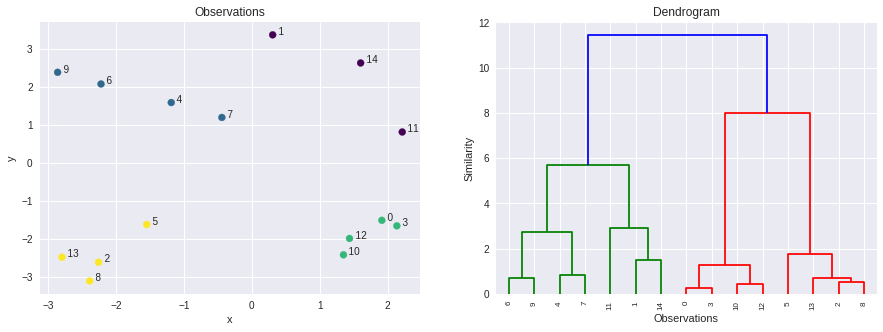

In [6]:
k = 4        # número de clusters
samples = 15 # amostras
lkg = "ward" # métrica escolhida no agrupamento hierárquico

# Cria amostrar sintéticas
X, y = make_classification(n_samples= samples, n_features=2, 
                           n_classes = k,
                           n_clusters_per_class=1,
                           n_informative=2, 
                           n_redundant=0, n_repeated=0,
                           class_sep = 2)

# Crie o modelo de agrupamento hierárquico
# Encontre os labels
model = AgglomerativeClustering(linkage=lkg, n_clusters=k)
model.fit(X)
labels = model.labels_


f_ex = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1,2)


ax = f_ex.add_subplot(gs[0,0])
ax.set_title("Observations")
ax.set_xlabel("x")
ax.set_ylabel("y")
dendro =f_ex.add_subplot(gs[0,1])


Z = hierarchy.linkage(X, lkg)
# Com base na matriz Z crie o Dendrograma
# pesquise por scipy.cluster.hierarchy.dendrogram() para implementar essa tarefa.
hierarchy.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)


dendro.set_title("Dendrogram")
dendro.set_xlabel("Observations")
dendro.set_ylabel("Similarity")

ax.scatter(X[:,0],X[:,1], c=labels, cmap='viridis')

# loop para adicionar o índice da amostra como rótulo
n, _ = X.shape
for i in range(n):
    ax.annotate("  " + str(i), (X[i,0],X[i,1]) )

plt.show()

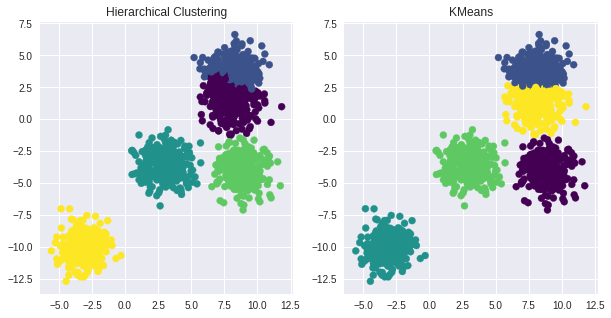

In [11]:
k = 5          # número de clusters
samples = 1500 # amostras
X, y = make_blobs(n_samples=samples, centers=k)

# Cluster hierárquico
# Crie modelo para encontrar os Centros. n_clusters= k, linkage="ward".
# Encontre os centros
model = AgglomerativeClustering(linkage=lkg, n_clusters=k)
model.fit(X)
centers_hc = model.labels_

# KMeans
# Repita o mesmo processo para o Kmeans
kmeans = KMeans(n_clusters=k).fit(X)
centers_kmeans = kmeans.labels_


# Comparação dos resultados
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1,2)
sub1 = fig.add_subplot(gs[0,0])
sub2 = fig.add_subplot(gs[0,1])

sub1.scatter(X[:,0],X[:,1], c=centers_hc, cmap='viridis')
sub1.set_title("Hierarchical Clustering")


sub2.scatter(X[:,0],X[:,1], c=centers_kmeans, cmap='viridis')
sub2.set_title("KMeans")

plt.show()


## Índices de Desempenho

Algoritmos de agrupamento tem como objetivo encontrar clusters com a maior similaridade possível. Desse modo, uma das maneiras de verificar o desempenho de um algoritmo para esse fim é verificar a vairância de cada clusters.
A função *cluster_variance(X, labels, k)* é implementada para receber os argumentos:

* X matriz com as observações $n \times d$. Neste problema $X_{1500 \times  2}$
* labels rótulos referentes aos agrupamentos $n\times 1$
* k quantidade de clusters (agrupamentos)

Essa função retorna um vetor com a variância de cada cluster. Pesquise por numpy.var para essa implementação. 

In [0]:
def cluster_variance(X, labels, k):
    var_array = np.zeros(k)
    
    for i in set(labels):
      idx = np.where(labels == i)
      var_array[i] = np.var(X[idx])
    
    return var_array

A função *center_cluster_distance(X, labels, k)* tem o comportamento semelhante à anterior (*cluster_variance(X, labels, k)* ), porém, o retorno agora será uma matriz contento as distâncias entre os núcleos (núcleos = ponto médio) dos agrupamentos. O objetivo de um algoritmo de agrupamento é criar clusters em que as amostras internas tenham alto índice de similaridade e sejam bem distintas de amostras presentes nos demais clusters. A distância euclideana entre os núcleos é um índice de desempenho para algorimos de agrupamento que aponta o quanto um cluster é distinto dos demais. Pesquise por scipy.spatial.distance.cdist para essa implementação.

In [0]:
def center_cluster_distance(X, labels, k):
    n,d = X.shape
    center_dist = np.zeros(k)
    
    for i in set(labels):
      idx = np.where(labels == i)
      center = np.median(X[idx], axis=0)
      center = np.array(center, dtype=np.float32).reshape(1,-1)
      
      center_dist[i] = np.mean(cdist(X[idx], center, 'euclidean'))

    return center_dist

In [22]:
cluster_hierarchi = cluster_variance(X,centers_hc,k)
cluster_kmeans = cluster_variance(X,centers_kmeans,k)

#imprima na tela a virancia média:
print("Hierarchical Clustering variance (mean): ", np.mean(cluster_hierarchi))
print("KMeans variance (mean): ", np.mean(cluster_kmeans))

Hierarchical Clustering variance (mean):  16.670341707537535
KMeans variance (mean):  16.87820124977776


In [93]:
dist_hierarch = center_cluster_distance(X,centers_hc,k)
dist_kmeans = center_cluster_distance(X,centers_kmeans,k)

#imprima na tela a média das distâncias entre os núcleos (pontos médios) dos clusters
print("Hierarchical Clustering centers distances (mean): ", np.mean(dist_hierarch))
print("KMeans centers distances (mean): ", np.mean(dist_kmeans))

Hierarchical Clustering centers distances (mean):  1.223214276307191
KMeans centers distances (mean):  1.2094494832802987


# Conectividade

Um aspecto interessante do nesse algoritmo é a possibilidade de utilizar restrições de conectividade (somente clusters adjacentes podem ser mesclados), através de uma matriz de conectividade que define quem são os vizinhos de cada amostras. As restrições de conectividade proíbem a fusão de pontos que não são adjacentes ao cluster, impossibilitando que o algoritmo salte camadas durante o agrupamento.

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


Text(0.5,1,'Connectivity=False')

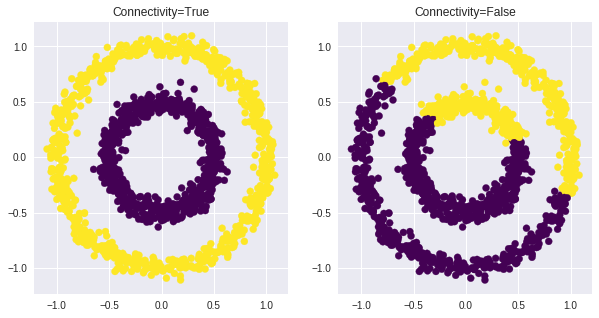

In [95]:
k = 2
samples = 1500
lkg = "average"

X,y = make_circles(n_samples=samples, factor=.5, noise=.05)

connectivity = kneighbors_graph( X, n_neighbors=4, include_self=False)

# Crie dois modelos de AgglomerativeClustering utilize um com linkage=lkg,
model1 = AgglomerativeClustering(linkage=lkg, connectivity=connectivity, n_clusters=k).fit(X)

# no outro modelo faça connectivity=None
model2 = AgglomerativeClustering(linkage=lkg, connectivity=None, n_clusters=k).fit(X)

f = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1,2)
s1 = f.add_subplot(gs[0,0])
s2 = f.add_subplot(gs[0,1])

s1.scatter(X[:, 0], X[:, 1], c=model1.labels_, cmap='viridis')
s1.set_title("Connectivity=True")


s2.scatter(X[:, 0], X[:, 1], c=model2.labels_, cmap='viridis')
s2.set_title("Connectivity=False")